<a href="https://colab.research.google.com/github/FraCorti/AI_Project/blob/master/spam_filter_vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Added **Kaggle** installation and downloading *spam.csv* dataset from the following link: [spam-collection-dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [0]:
!pip install kaggle
!mkdir /root/.kaggle
!echo '{"username":"fcorti","key":"f6cb1b6a4e144d900623ca8d446b0fa3"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d uciml/sms-spam-collection-dataset
!pip install pandas
!pip install -q tensorflow_data_validation

import tensorflow_data_validation as tfdv
import pandas as pd
import tensorflow as tf

from zipfile import ZipFile

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


Imported **pandas** and convert the *sms-spam-collection-dataset.zip* file into *.csv* format


In [0]:
zip_file = ZipFile('/content/sms-spam-collection-dataset.zip')
data = pd.read_csv(zip_file.open('spam.csv'), encoding = "latin-1")
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
tags = data["label"]
texts = data["text"]  
print("Dataset shape: ", data.shape)

Dataset shape:  (5572, 2)


Save the dataset **locally** to allow viewing by clicking on it: 

In [0]:
data.to_csv(r'/content/spam.csv', index = None, header = True)

Dataset **statistics**: 

In [0]:
train_stats = tfdv.generate_statistics_from_csv(data_location = '/content/spam.csv')
tfdv.visualize_statistics(train_stats)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


**Divided data** into training set and test set: 

1.   List item
2.   List item



In [0]:
!pip install sklearn

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import metrics

num_max = 1000  # calcolare le medie e capire meglio il pre-processing  dei dati, paragonare risultati ottenuti rete con altri in internet
le = LabelEncoder()  # analizzare le metriche di cosa sta succedendo 
tags = le.fit_transform(tags) # provare a semplificare rete neurale e vedere cosa succede effettivamente (mostrare accuratezza nel test set)
# print(tags.shape)  # fare breve report (relazione dove spieghiamo cosa facciamo)
# confronto con diversi tipi di algoritmi di apprendimento quanto "imparano" attenzione ad usare lo stesso dataser"
tokenizer = Tokenizer(num_words = num_max)  # allows to vectorize a text corpus, by turning each text into either a sequence of integers or into a vector.
tokenizer.fit_on_texts(texts) # updates internal vocabulary based on a list of texts. Creates the vocabulary index based on word frequency.
mat_texts = tokenizer.texts_to_matrix(texts, mode = 'count')  # count: the count of each word in the document.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(texts , tags, test_size = 0.2)
mat_texts_tr = tokenizer.texts_to_matrix(x_train, mode = 'count')
mat_texts_tst = tokenizer.texts_to_matrix(x_test, mode = 'count')

print (x_train.shape, y_train.shape) # print the train dataset shape 
print (x_test.shape, y_test.shape)   # print the test dataset shape

(4457,) (4457,)
(1115,) (1115,)


In [0]:
#Seguendo https://realpython.com/python-keras-text-classification/
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
sentences = data['text'].values
y = data['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<4179x7388 sparse matrix of type '<class 'numpy.int64'>'
	with 55014 stored elements in Compressed Sparse Row format>

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (0.9.1)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9798994974874372


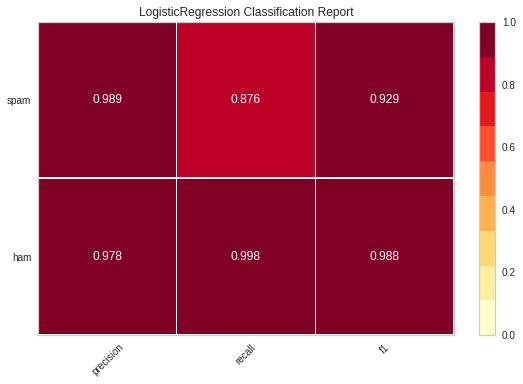

In [0]:
!pip install -U yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
visualizer = ClassificationReport(classifier)  # yellowbrick wrap scikit-learn models for evaluation
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

#Fino a https://realpython.com/python-keras-text-classification/